# Project overview

The work done within this project was for the capstone project of Udacity's Data Scientist Nanodegree. The goal was to demostrate my understanding in the data science processes through a project that interests me. 
This project is about to classify songs into categories like Rock or Hip-Hop using predefined features created by The Echo Nest research group. I have chosen this project not only because I like music but because of the growing application of machine learning driven signal processing in other industries' use cases (like manufacturing, automotive etc) which I find very similar to the current project. 
In all cases one would have descriptive features derived from signals and could use for clustering or classifying the records to automatize engineering processes. 

# Problem statement

To make a relevant recommendation for a customer who wants to listen rock music, the streamer should avoid recommending any other type of music. Features from songs are determined by some criteria and the task of the machine larning model is to decide its genre (in this specific case only binary classification is applied -- rock or hip-hop--) using those features.
My main objective is to find a model that can classify song with high accuracy and also study what could affect the effectiveness of a modell.

# Metrics

To measure how well our model predicts classes, it is reasonable to calculate precision, recall and F-1 score. 

Precision = (TP)/(TP+FP)
When to use: Precision is a good choice in our metrics when we want to be very sure of our prediction.

Recall = (TP)/(TP+FN)
When to use: Recall is a good choice in our metrics when we want to capture as many positives as possible.

F1 score = 2 x (precision x recall)/(precision+recall)
when to use: F1 score is a good choice if we want to select a model with high precision and high recall.

Additionally, I have used ROC (Receiver Operating Characteristics)-AUC (Area Under The Curve) curves as well to analyze the performance of the models. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

# Data exploration and visualization

The two files that are used during this project contain the track's metadata and derived values created by The Echo Nest group. The first is in csv file format while the later is in json format. After reading the files we can explore their columns and values only printing the first few rows.

In the track metadata file the genre_top column indicates the type of the song; whether it is rock or hip-hop. Besides this one can find information e.g. about the composer, the date of the record and duration of the track.

In the echonest file we can check the number and type of derived values that were prepared. All features have a range between zero and 1 only the tempo has a value range of 29-250 which is two order higher.

By merging the the two file via the track_id we can assigne the genre_top of the track to its derived values.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in track metadata 
tracks = pd.read_csv('datasets/fma-rock-vs-hiphop.csv')

# Read in track metrics w
echonest_metrics = pd.read_json('datasets/echonest-metrics.json',precise_float=True)

# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = echonest_metrics.merge(tracks[['track_id','genre_top']], on = 'track_id')

echo_tracks.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


With distribution plots one analyze the shape of the values' distribution, the peaks, and the overlap of the two classes' values.

Only looking at the distribution plots it is not possible to distinguish the values of the two type of songs. The values have a wide overlap. Maybe the danceability os the only one having left skewed values for Rock and right skewed values for Hip-Hop. Regarding to the other features, both class either have two peaks or very flat.

In [ ]:
echo_tracks_melt = echo_tracks[['acousticness', 'danceability', 'energy','instrumentalness', 'liveness', 'speechiness', 'valence','genre_top']].melt(id_vars='genre_top')


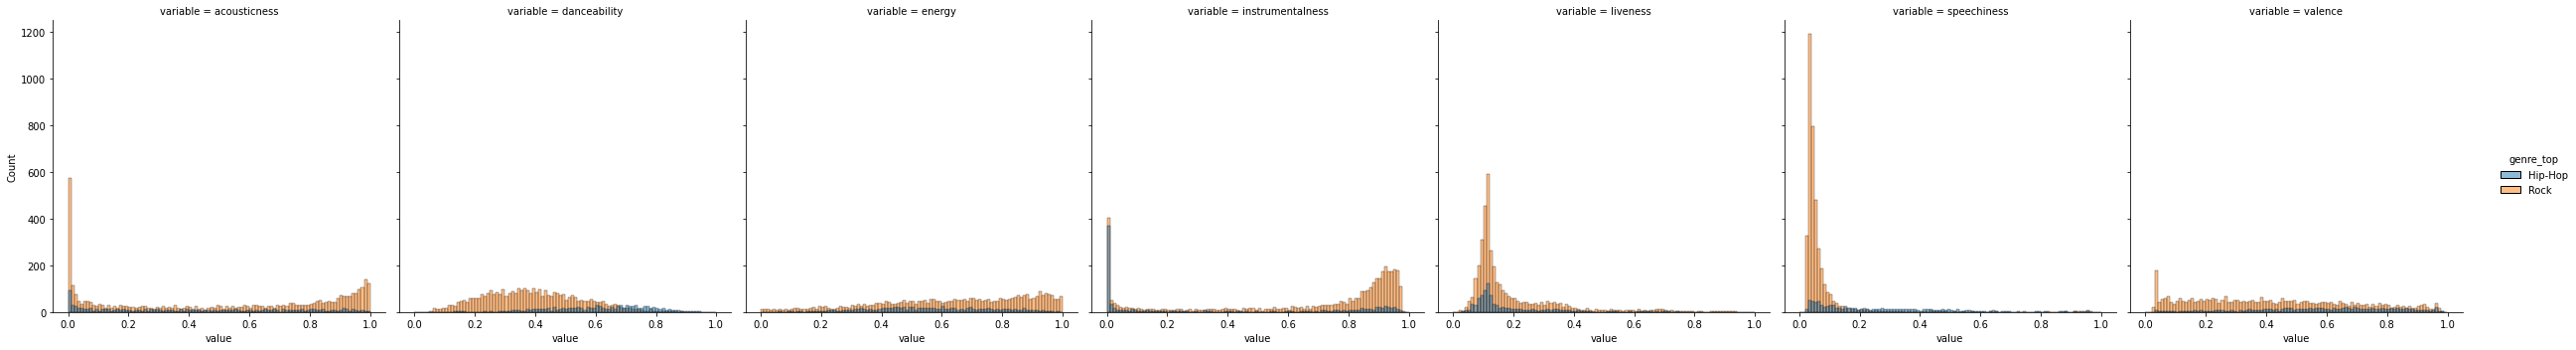

In [ ]:
g = sns.displot(
    data=echo_tracks_melt,
    x='value', 
    hue='genre_top', 
    kind='hist', 
    fill=True,
    col='variable',
    bins=100
)

The tempo feature was separately visualized because of the altered value range. 

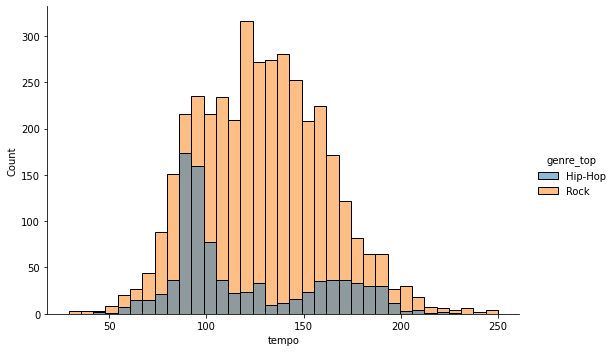

In [ ]:
tempo_distplot = sns.displot(data=echo_tracks, x='tempo', hue='genre_top', kind='hist', height=5, aspect=1.5)

Strong correlations between variables should generally be avoided in order to simplify the model and make it easier to interpret (with many features, we run the risk of overfitting) furthermore our computation time can be significantly speed up.

Pandas corr() function is used to calculate -as a default- pearson correlation coefficient which examines the linear dependency of the features. Heatmap is a good visulaization method to present the correlation matrix by indicating - in the case of our chosen colorpalette - high positive correlation (in case of feature values are moving in the same direction) with darker red while high negative correlation (in case of feature values are moving in the opposite direction) with darker blue. Light red and light blue values show low correlation.

It is enough to show only the part below the matrix diagonal since values are mirrored.

In this dataset the highest correlation is 0.47 which means a medium correlation, thus we can conclude that there are no strongly correlated features which could negatively influence our model performance.

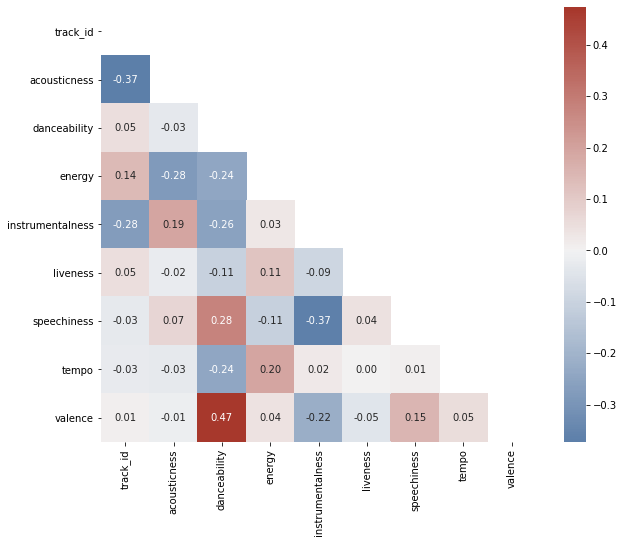

In [ ]:
# Calculate pairwise-correlation
matrix = echo_tracks.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

Using seaborn's countplot function one can discover of the number of labeled data which is a useful information when making machine learning models. We have to take care to have balanced data to reach good model performance.
It seen below that songs with "Rock" label occur 4x more compared to songs with "Hip-Hop" label. We need to think about a startegy to handle this situation.
But first let's keep everything as it is without balacing the dataset and see how will be the results.

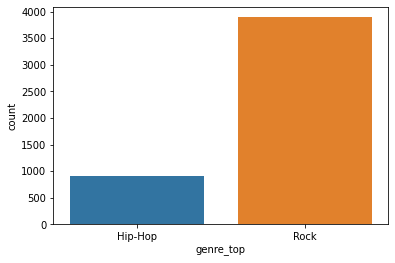

In [ ]:
ax = sns.countplot(x="genre_top", data=echo_tracks)

## Creating train and test sets
We can now divide our data into an array containing our characteristics and another containing the labels — the genre of the songs — because we didn't uncover any especially strong relationships between our features.
After separating the data into these arrays, we will carry out certain preprocessing operations to optimize the creation of our models.

In [ ]:
# Import train_test_split function 
from sklearn.model_selection import train_test_split

# Create features by dropping track_id and genre_top
features = echo_tracks.drop(columns=['track_id', 'genre_top'], axis=1).values

# Create labels using genre_top
labels = echo_tracks['genre_top'].values

# Split our data into train and test features and labels
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=0)

## Scaling data

We do not want that one feature over-dominates the other thus creating bias in our model. Instead we would like to have our model equally handle feature values to get all important meaning out of them. To avoid feature dominance, we must normalize our train and test features. 
There are several ways to accomplish this, but the most popular one is standardization, where all features have a mean of 0 and a standard deviation of 1.

Please, note that we use fit_transform() for training features while transform() for test data.

Everyone is aware that we use the transform() function for our test data and the fit transform() method for our training data. However, the real question is, "Why do we do this?"

The training data is scaled and its scaling parameters are learned by applying fit transform() to the training data. The model we created in this case will discover the mean and variance of the characteristics in the training set. We then scale our test data using these newly learned parameters.

The mean and variance determined from our training data can be used to change our test data using the transform method. We may therefore convert our test data using the parameters that our model learned from the training set.

[reference: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe]

In [ ]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# creating s standar scaler object
scaler = StandardScaler()

# Scale train_features and test_features
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

## Building classification models

Three machine larning algorithm will be compared to each other:
    Random Forest,
    Logistic Regression,
    Gradient Boosting Tree.

First, model objects are created with fixed random_state in order to obtain a deterministic behaviour during fitting.
Then, models are fitted with scaled train features and train labels.
Finally, labels are predicted from scaled test features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

rf = RandomForestClassifier(random_state=0)
lr = LogisticRegression(random_state=0)
gb = GradientBoostingClassifier(random_state=0)

rf.fit(scaled_train_features,train_labels)
lr.fit(scaled_train_features,train_labels)
gb.fit(scaled_train_features,train_labels)

pred_labels_rf = rf.predict(scaled_test_features)
pred_labels_lr = lr.predict(scaled_test_features)
pred_labels_gb = gb.predict(scaled_test_features)

## Compare models

Classification_report function is used to analyze models' performances. Precision, recall and F1-score values are calculated, moreover, ROC_AUC curves are plotted.

From the classification reports we can see that all three models already have very high metric values (above 90% for precision, recall and F1-score) for Rock labels but they are much lower for Hip-Hop.

ROC_AUC curves show that Rock labels of Random Forest model generate the largest area below the ROC curve meaning it has the highest performance. Gradient Boosting Tree model sligthly stays below while Logistic regression model has the poorest (but still quite good) performance.

In [ ]:
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn import metrics
class_report_rf = classification_report(test_labels, pred_labels_rf)
class_report_lr = classification_report(test_labels, pred_labels_lr)
class_report_gb = classification_report(test_labels, pred_labels_gb)



print("Random Forest: \n", class_report_rf)
print("Logistic Regression: \n", class_report_lr)
print("Gradient Boosting Tree: \n", class_report_gb)



Random Forest: 
               precision    recall  f1-score   support

     Hip-Hop       0.81      0.73      0.76       237
        Rock       0.93      0.96      0.95       964

    accuracy                           0.91      1201
   macro avg       0.87      0.84      0.86      1201
weighted avg       0.91      0.91      0.91      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.76      0.59      0.66       237
        Rock       0.90      0.95      0.93       964

    accuracy                           0.88      1201
   macro avg       0.83      0.77      0.79      1201
weighted avg       0.87      0.88      0.88      1201

Gradient Boosting Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.80      0.73      0.77       237
        Rock       0.94      0.96      0.95       964

    accuracy                           0.91      1201
   macro avg       0.87      0.84      0.86      1201
weighted

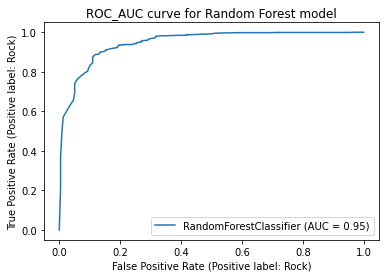

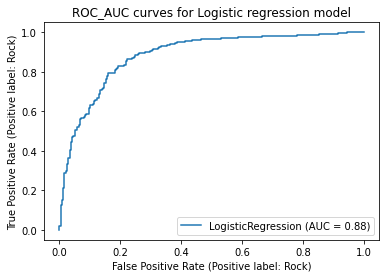

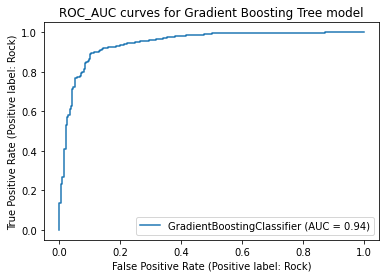

In [ ]:
plot_roc_curve(rf, scaled_test_features, test_labels)
plt.title('ROC_AUC curve for Random Forest model')
plt.show()
plot_roc_curve(lr, scaled_test_features, test_labels)
plt.title('ROC_AUC curves for Logistic regression model')
plt.show()
plot_roc_curve(gb, scaled_test_features, test_labels)
plt.title('ROC_AUC curves for Gradient Boosting Tree model')
plt.show()

One possible solution to improve model performance regarding to Hip-Hop song classification is to balance the dataset. As we have seen there are 4 times more Rock labels compared to Hip-Hop labels which makes the dataset imbalanced. By oversampling or undersampling the dataset could help to overcome on this issue.

Let's try first doing random oversampling on the Hip-Hop labels!

## Solving imbalanced dataset

Creating an RandomOverSampler using the imblearn library, we can fit our dataset to get equal number for all class labels. After we have to again split the dataset for training and testing, finally repeating the model training procedure then we predict the labels from the test set, new results can be analyzed.

Amazingly Random Forest model can almost perfectly indentify Rock and Hip-Hop songs as excellent ROC curves proves as well! Gradinet Boosting Tree also became very good and even Logistic Regression model has a very decent equally good performance for both labels.

Can we even reach better performance? Another solution is to use feature reduction methods like PCA. Let's see if we can improve more even our Logistic regression model.

In [ ]:
from imblearn.over_sampling import RandomOverSampler 

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')

features_over, labels_over = oversample.fit_resample(features, labels)

train_features, test_features, train_labels, test_labels = train_test_split(features_over, labels_over)

scaled_train_features = scaler.fit_transform(train_features)

scaled_test_features = scaler.transform(test_features)

In [ ]:
rf = RandomForestClassifier(random_state=0)
lr = LogisticRegression(random_state=0)
gb = GradientBoostingClassifier(random_state=0)

rf.fit(scaled_train_features,train_labels)
lr.fit(scaled_train_features,train_labels)
gb.fit(scaled_train_features,train_labels)

pred_labels_rf = rf.predict(scaled_test_features)
pred_labels_lr = lr.predict(scaled_test_features)
pred_labels_gb = gb.predict(scaled_test_features)

In [ ]:
class_report_rf = classification_report(test_labels, pred_labels_rf)
class_report_lr = classification_report(test_labels, pred_labels_lr)
class_report_gb = classification_report(test_labels, pred_labels_gb)



print("Random Forest: \n", class_report_rf)
print("Logistic Regression: \n", class_report_lr)
print("Gradient Boosting Tree: \n", class_report_gb)

In [ ]:
plot_roc_curve(rf, scaled_test_features, test_labels)
plt.title('ROC_AUC curve for Random Forest model')
plt.show()
plot_roc_curve(lr, scaled_test_features, test_labels)
plt.title('ROC_AUC curves for Logistic regression model')
plt.show()
plot_roc_curve(gb, scaled_test_features, test_labels)
plt.title('ROC_AUC curves for Gradient Boosting Tree model')
plt.show()

## Principal Component Analysis 

It can be especially beneficial to simplify our models and use as few features as possible to achieve the best results. We can use Principal Component Analysis (PCA) to reduce the number of features.
It is possible that only a few features in the dataset can explain the variation between genres. PCA rotates the data along the axis with the greatest variance, allowing us to calculate the relative contribution of each feature of our data to the variance between classes.


We got as many PCA component as many features we have. One can see from the bar plots that the first component explains around 25% of the variance between the music genres, but unfortunately we cannot see a clear elbow where we should determine the limit for the best components.
Thus it is useful to plot cumulative explained variances as well with a step plot. As a general practice, we can say, one should take all components below the limit where the cumsum reaches 85%. Following this rule, in our case six components are the ideal.



In [ ]:
# Import  PCA class
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_train_features)

explained_variance = pca.explained_variance_ratio_
# cumulative explained variance
cum_explained_variance = np.cumsum(explained_variance)


In [ ]:
plt.bar(range(0,len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_explained_variance)), cum_explained_variance, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Creating new models using PCA features


As we saw before six is an ideal number for components that is why we set n_component=6 in the paramater when creating a pca object.

Unfortunately we could not improve the performance of our Logistic Regression model. It got even worse for all three models, thus we should not use PCA in for this dataset.

In [ ]:

pca = PCA(n_components=6, random_state=0)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_train_features)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_test_features)

In [ ]:
rf = RandomForestClassifier(random_state=0)
lr = LogisticRegression(random_state=0)
gb = GradientBoostingClassifier(random_state=0)

rf.fit(train_pca,train_labels)
lr.fit(train_pca,train_labels)
gb.fit(train_pca,train_labels)

pred_labels_rf = rf.predict(test_pca)
pred_labels_lr = lr.predict(test_pca)
pred_labels_gb = gb.predict(test_pca)

In [ ]:
class_report_rf = classification_report(test_labels, pred_labels_rf)
class_report_lr = classification_report(test_labels, pred_labels_lr)
class_report_gb = classification_report(test_labels, pred_labels_gb)



print("Random Forest: \n", class_report_rf)
print("Logistic Regression: \n", class_report_lr)
print("Gradient Boosting Tree: \n", class_report_gb)

## Summary

The goal of the project was to create a sofware solution which can distinguish song genres - like in this particular case rock and hip-hop songs - from each other using derived features.

The derived features (8 feautures were created for each song) were built by The Echo Nest reasearch group.

Feature data was analyzed by plotting histograms, creating correlation matrix and summary satistics. Label vector countplot showed that there are much more rock songs in the dataset than hip-hop songs.

No strong correlation were found between features which is beneficial for a machine larning model.

Feature scaling was applied in order to avoid some features being too dominant. We have seen that tempo feature had values two order higher than the others.

Random Forest model was outperforming the two other (Logistic regression and Gradient Boosting Tree) models but hip-hop song label prediction performance was much behind rock label prediction capability.

Data balancing was then applied in order to overcome this issue, which proved to be succesfull. All model improved a lot, and Random Forest (which was already very good) is now able perfectly distiguish rock and hip-hop songs.

In order to still push the models to the limit PCA was applied to reduce feture numbers by creating new componenets, but this approach did not help at this particular dataset.



## Outlook

To have more valid labeled data for the application, we could ask customers to add feedback if the recommended song was really the one they wished to have; e.g. if the system correctly recommended a rock song for a users who was targeted with rock songs.  

## Acknowledgement

I do really appreciate for The Echo Nest research group for making their dataset available.